## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [0]:
import tensorflow as tf

#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()
tf.set_random_seed(40)

In [4]:
# TensorFlow version
tf.__version__

'1.13.0-rc1'

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [14]:
# Shape of Train and Test Data

print("Train X sample:",trainX.shape[0])

print("Train Y sample:",trainY.shape[0])



Train X sample: 60000
Train Y sample: 60000


In [15]:
print("Test X sample:",testX.shape[0])

print("Test Y sample:",testY.shape[0])

Test X sample: 10000
Test Y sample: 10000


### Find dimensions of an image in the dataset

In [16]:
print("Train X dimension:",trainX.shape)

print("Train Y dimension:",trainY.shape)

print("Test X dimension:",testX.shape)

print("Test Y dimension:",testY.shape)


Train X dimension: (60000, 28, 28)
Train Y dimension: (60000,)
Test X dimension: (10000, 28, 28)
Test Y dimension: (10000,)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [17]:
# One hot encoding for output label

trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

print("Train Y:",trainY.shape)

print("Test Y:",testY.shape)

Train Y: (60000, 10)
Test Y: (10000, 10)


In [18]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
# normalizing the data to help with the training
trainX=trainX /255
testX=testX / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
# building the input vector from the 28x28 pixels
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1).astype('float32')
testX = testX.reshape(testX.shape[0], 28, 28, 1).astype('float32')

In [33]:
# print the final input shape ready for training
print("Train matrix shape", trainX.shape)
print("Test matrix shape", testX.shape)

Train matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10
callback_list=5

In [36]:
# Define model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))

    # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model.fit(trainX, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(testX,testY), callbacks=callback_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.3732 - acc: 0.8654 - val_loss: 0.3092 - val_acc: 0.8844
Epoch 2/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.2328 - acc: 0.9144 - val_loss: 0.2509 - val_acc: 0.9083
Epoch 3/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.1665 - acc: 0.9387 - val_loss: 0.2642 - val_acc: 0.9052
Epoch 4/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.1137 - acc: 0.9582 - val_loss: 0.2700 - val_acc: 0.9177
Epoch 5/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0750 - acc: 0.9722 - val_loss: 0.2966 - val_acc: 0.9156
Epoch 6/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0520 - acc: 0.9811 - val_loss: 0.3709 - val_acc: 0.9171
Epoch 7/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0351 - acc: 0.9872 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [37]:

    # Define Model
    model1 = Sequential()

    # 1st Conv Layer
    model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(32, 3, 3))
    model1.add(Activation('relu'))

    # Max Pooling
    model1.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model1.add(Dropout(0.25))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(128))
    model1.add(Activation('relu'))
    
    # Prediction Layer
    model1.add(Dense(10))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model1.fit(trainX, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(testX, testY), callbacks=callback_list)
    

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.3956 - acc: 0.8568 - val_loss: 0.2998 - val_acc: 0.8897
Epoch 2/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.2566 - acc: 0.9051 - val_loss: 0.2542 - val_acc: 0.9025
Epoch 3/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.2091 - acc: 0.9224 - val_loss: 0.2288 - val_acc: 0.9174
Epoch 4/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.1738 - acc: 0.9355 - val_loss: 0.2226 - val_acc: 0.9179
Epoch 5/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.1490 - acc: 0.9445 - val_loss: 0.2259 - val_acc: 0.9206
Epoch 6/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.1264 - acc: 0.9526 - val_loss: 0.2338 - val_acc: 0.9194
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.1082 - acc: 0.9600 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(trainX)

#test generator
test_gen = ImageDataGenerator()

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

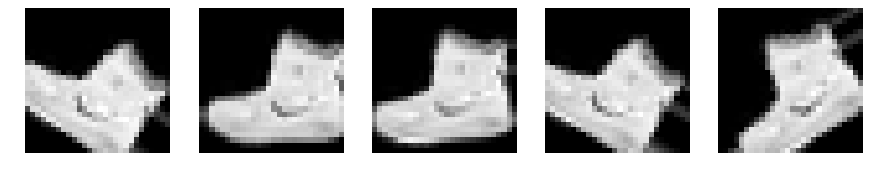

In [42]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
train_generator = datagen.flow(trainX, trainY, batch_size=64)
test_generator = test_gen.flow(testX, testY, batch_size=64)

In [45]:
model1.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 22s 24ms/step - loss: 0.7328 - acc: 0.7349 - val_loss: 0.3152 - val_acc: 0.8892
Epoch 2/5
937/937 [==============================] - 23s 24ms/step - loss: 0.5351 - acc: 0.8013 - val_loss: 0.3080 - val_acc: 0.8929
Epoch 3/5
937/937 [==============================] - 23s 24ms/step - loss: 0.4847 - acc: 0.8209 - val_loss: 0.3029 - val_acc: 0.8925
Epoch 4/5
937/937 [==============================] - 23s 24ms/step - loss: 0.4538 - acc: 0.8313 - val_loss: 0.3018 - val_acc: 0.8934
Epoch 5/5
937/937 [==============================] - 23s 24ms/step - loss: 0.4340 - acc: 0.8388 - val_loss: 0.2838 - val_acc: 0.8998


###  Report the final train and validation accuracy

In [48]:
score = model1.evaluate(trainX, trainY)
print()
print('Test accuracy: ', score[1])

60000/60000 [==============================] - 5s 82us/step

Test accuracy:  0.9244


In [49]:
score = model1.evaluate(testX, testY)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 84us/step

Test accuracy:  0.8994


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

## Load CIFAR10 dataset

In [0]:
from keras.datasets import cifar10

In [54]:
(trainX, trainY), (testX, testY) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 25s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator


# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:

# Prepare the generator
data_gen.fit(trainX)


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


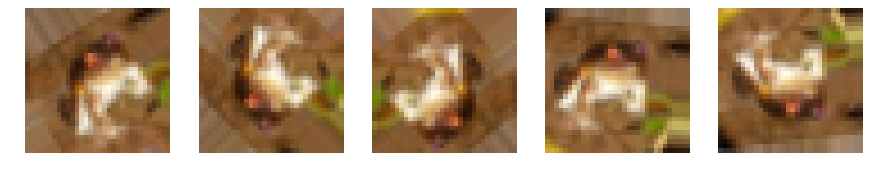

In [67]:
from matplotlib import pyplot as plt
from scipy.misc import toimage
gen = data_gen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(toimage(gen.next().squeeze()), cmap='gray')
    plt.plot()
plt.show()